In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from os import path

data_dir = 'data/bank-transactions'
data_file = 'bank-transactions.csv'
data_path = path.join(data_dir, data_file)

df = pd.read_csv(data_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [3]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [4]:
df['CustLocation'].value_counts()

MUMBAI                         103595
NEW DELHI                       84928
BANGALORE                       81555
GURGAON                         73818
DELHI                           71019
                                ...  
ROAD (E) THANE                      1
TO APOLO PHARMACY BANGALORE         1
PILLAR NO 725 NEW DELHI             1
COMPANY BANGALORE                   1
IMPERIA THANE WEST                  1
Name: CustLocation, Length: 9355, dtype: int64

#### Droppando nulos

In [5]:
df.dropna(inplace=True)

#### Entendendo atributos

In [6]:
df.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [7]:
print(df['CustomerDOB'].values)
print(np.unique(df['CustGender'].values, return_counts=True))

['10/1/94' '4/4/57' '26/11/96' ... '18/5/89' '30/8/78' '5/3/84']
(array(['F', 'M', 'T'], dtype=object), array([280635, 760978,      1]))


In [8]:
print(np.unique(df['CustLocation'].values).shape)

(9275,)


#### Transformando atributos

Transformando Date Of Birth (DOB) em idade

In [9]:
def takeYear(dob):
    return list( map(lambda x: int(x), dob.split('/')) )[-1]

def takeMonth(dob):
    return list( map(lambda x: int(x), dob.split('/')) )[1]

def takeDay(dob):
    return list( map(lambda x: int(x), dob.split('/')) )[0]
    
df['YearDOB'] = df['CustomerDOB'].apply(takeYear)
df['MonthDOB'] = df['CustomerDOB'].apply(takeMonth)
df['DayDOB'] = df['CustomerDOB'].apply(takeDay)

df[['DayDOB', 'MonthDOB', 'YearDOB']]

,DayDOB,MonthDOB,YearDOB
0,10,1,94
1,4,4,57
2,26,11,96
3,14,9,73
4,24,3,88
...,...,...,...
1048562,8,4,90
1048563,20,2,92
1048564,18,5,89
1048565,30,8,78


Validando dias, meses e anos

In [10]:
day_valid = (df['DayDOB'] <= 31) & (df['DayDOB'] >= 1)
month_valid = (df['MonthDOB'] <= 12) & (df['MonthDOB'] >= 1)
year_valid = (df['YearDOB'] <= 99) & (df['YearDOB'] >= 0)

day_valid.all(), month_valid.all(), year_valid.all()

(True, True, False)

Removendo as entradas com valores inválidos para ano

In [11]:
df = df[year_valid]
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),YearDOB,MonthDOB,DayDOB
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,94,1,10
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,57,4,4
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0,96,11,26
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0,73,9,14
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,88,3,24
...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0,90,4,8
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0,92,2,20
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0,89,5,18
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0,78,8,30


Utilizando apenas o ano para decidir idade

In [12]:
df['CustomerAge'] = 2022 - df['YearDOB'].apply(lambda x: 1900 + x if x > 22 else 2000 + x)
df[['CustomerAge', 'YearDOB']]

,CustomerAge,YearDOB
0,28,94
1,65,57
2,26,96
3,49,73
4,34,88
...,...,...
1048562,32,90
1048563,30,92
1048564,33,89
1048565,44,78


Revendo dataset

In [13]:
df.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),YearDOB,MonthDOB,DayDOB,CustomerAge
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,94,1,10,28
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,57,4,4,65
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0,96,11,26,26
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0,73,9,14,49
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,88,3,24,34


In [14]:
df.drop(columns=['TransactionID', 'CustomerID', 'CustomerDOB', 'YearDOB', 'MonthDOB', 'DayDOB'], inplace=True)

In [15]:
df.head(5)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,28
1,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,65
2,F,MUMBAI,17874.44,2/8/16,142712,459.0,26
3,F,MUMBAI,866503.21,2/8/16,142714,2060.0,49
4,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,34


#### Analisando `CustLocation`

In [16]:
df['CustLocation'].value_counts()[:20]

MUMBAI         97679
BANGALORE      77751
NEW DELHI      76380
GURGAON        70518
DELHI          67335
NOIDA          31675
CHENNAI        27500
PUNE           24493
HYDERABAD      21819
THANE          21006
KOLKATA        19033
GHAZIABAD      14624
NAVI MUMBAI    11932
AHMEDABAD      11266
FARIDABAD      10641
JAIPUR          9231
CHANDIGARH      8801
LUCKNOW         7338
MOHALI          5828
SURAT           5173
Name: CustLocation, dtype: int64

É possível transformar em um atributo numérico ordinal, preservando a relação de ordem pela quantidade de pessoas em cada cidade. É possível simplesmente droppar esse atributo também...

Acho que, para um primeiro teste, vamos apenas droppá-lo.

##### PROVIDÊNCIA DO FUTURO

Olá, aqui é o Treme do futuro, e estou passando para avisar que, com todos os 1 milhão de dados, o HDBSCAN crasha qualquer PC que tentar rodá-lo. Então, vamos tentar selecionar apenas as entradas das três maiores cidades:

In [17]:
df = df[ (df['CustLocation'] == 'MUMBAI') | (df['CustLocation'] == 'BANGALORE') | (df['CustLocation'] == 'NEW DELHI') ]

In [18]:
df.drop(columns='CustLocation', inplace=True)
df.head(5)

/tmp/ipykernel_15189/503692593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='CustLocation', inplace=True)


,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
2,F,17874.44,2/8/16,142712,459.00,26
3,F,866503.21,2/8/16,142714,2060.00,49
6,F,973.46,2/8/16,173806,566.00,30
7,M,95075.54,2/8/16,170537,148.00,40
9,M,4279.22,2/8/16,192446,289.11,38


#### Lidando com CustGender

In [19]:
df['CustGender'].value_counts()

M    174118
F     77692
Name: CustGender, dtype: int64

In [20]:
df['CustGender'] = df['CustGender'].apply(lambda x: float(x == 'F'))
df.head(5)

/tmp/ipykernel_15189/2309713277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustGender'] = df['CustGender'].apply(lambda x: float(x == 'F'))


,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
2,1.0,17874.44,2/8/16,142712,459.00,26
3,1.0,866503.21,2/8/16,142714,2060.00,49
6,1.0,973.46,2/8/16,173806,566.00,30
7,0.0,95075.54,2/8/16,170537,148.00,40
9,0.0,4279.22,2/8/16,192446,289.11,38


#### Lidando com `TransactionDate`

Talvez possamos simplesmente criar três atributos, um para o dia da transação, um para o mês e outro para o ano.

In [21]:
df[['TransactionDay', 'TransactionMonth', 'TransactionYear']] = df['TransactionDate'].str.split('/', expand=True)
df.head(5)

/tmp/ipykernel_15189/3208363030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['TransactionDay', 'TransactionMonth', 'TransactionYear']] = df['TransactionDate'].str.split('/', expand=True)
/tmp/ipykernel_15189/3208363030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['TransactionDay', 'TransactionMonth', 'TransactionYear']] = df['TransactionDate'].str.split('/', expand=True)
/tmp/ipykernel_15189/3208363030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,TransactionDay,TransactionMonth,TransactionYear
2,1.0,17874.44,2/8/16,142712,459.00,26,2,8,16
3,1.0,866503.21,2/8/16,142714,2060.00,49,2,8,16
6,1.0,973.46,2/8/16,173806,566.00,30,2,8,16
7,0.0,95075.54,2/8/16,170537,148.00,40,2,8,16
9,0.0,4279.22,2/8/16,192446,289.11,38,2,8,16


Validando entradas para esses três atributos:

In [22]:
df['TransactionDay'] = df['TransactionDay'].astype('float64')
df['TransactionMonth'] = df['TransactionMonth'].astype('float64')
df['TransactionYear'] = df['TransactionYear'].astype('float64')

/tmp/ipykernel_15189/1710006791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransactionDay'] = df['TransactionDay'].astype('float64')
/tmp/ipykernel_15189/1710006791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransactionMonth'] = df['TransactionMonth'].astype('float64')
/tmp/ipykernel_15189/1710006791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [23]:
transday_valid = (df['TransactionDay'] <= 31) & (df['TransactionDay'] >= 1)
transmonth_valid = (df['TransactionMonth'] <= 12) & (df['TransactionMonth'] >= 1)
transyear_valid = (df['TransactionYear'] <= 99) & (df['TransactionYear'] >= 0)

transday_valid.all(), transmonth_valid.all(), transyear_valid.all()

(True, True, True)

Tudo certo. Então, é só droppar o atributo antigo.

In [24]:
df.drop(columns='TransactionDate', inplace=True)
df.head(5)

/tmp/ipykernel_15189/2172276268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='TransactionDate', inplace=True)


,CustGender,CustAccountBalance,TransactionTime,TransactionAmount (INR),CustomerAge,TransactionDay,TransactionMonth,TransactionYear
2,1.0,17874.44,142712,459.00,26,2.0,8.0,16.0
3,1.0,866503.21,142714,2060.00,49,2.0,8.0,16.0
6,1.0,973.46,173806,566.00,30,2.0,8.0,16.0
7,0.0,95075.54,170537,148.00,40,2.0,8.0,16.0
9,0.0,4279.22,192446,289.11,38,2.0,8.0,16.0


#### Garotice: transformar os horários de transação em UNIX timestamp

É possível condensar `TransactionDay`, `TransactionMonth`, `TransactionYear` e `TransactionTime` em um único atributo: `TransactionTimestamp`. Vamo tentar fazer essa garotice.

Primeiro, bora descobrir uma coisa: quão grande são os valores em `TransactionTime`?

In [25]:
aux = df['TransactionTime'].apply(lambda x: len(str(x)))
(aux == 7).any(), (aux == 6).any(), (aux == 5).any(), (aux == 4).any(), \
                  (aux == 3).any(), (aux == 2).any(), (aux == 1).any()

(False, True, True, True, True, True, True)

Oi? Tem entrada com tamanho 1 nesse atributo? Bora ver isso aí:

In [26]:
idx = (aux == 1).idxmax()
df.loc[idx]

CustGender                  0.0
CustAccountBalance          1.6
TransactionTime             8.0
TransactionAmount (INR)    10.0
CustomerAge                33.0
TransactionDay              2.0
TransactionMonth            8.0
TransactionYear            16.0
Name: 62450, dtype: float64

Realmente, tem mesmo... F...

Vamos fazer essa separação algebricamente, então:

In [27]:
df['TimeHours']   = df['TransactionTime'] // 10000
df['TimeMinutes'] = (df['TransactionTime'] // 100) - ((df['TransactionTime'] // 10000) * 100)
df['TimeSeconds'] = df['TransactionTime'] - (df['TransactionTime'] // 100) * 100

df.head(5)

/tmp/ipykernel_15189/3357294119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeHours']   = df['TransactionTime'] // 10000
/tmp/ipykernel_15189/3357294119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeMinutes'] = (df['TransactionTime'] // 100) - ((df['TransactionTime'] // 10000) * 100)
/tmp/ipykernel_15189/3357294119.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,CustGender,CustAccountBalance,TransactionTime,TransactionAmount (INR),CustomerAge,TransactionDay,TransactionMonth,TransactionYear,TimeHours,TimeMinutes,TimeSeconds
2,1.0,17874.44,142712,459.00,26,2.0,8.0,16.0,14,27,12
3,1.0,866503.21,142714,2060.00,49,2.0,8.0,16.0,14,27,14
6,1.0,973.46,173806,566.00,30,2.0,8.0,16.0,17,38,6
7,0.0,95075.54,170537,148.00,40,2.0,8.0,16.0,17,5,37
9,0.0,4279.22,192446,289.11,38,2.0,8.0,16.0,19,24,46


Passando tudo pra inteiro por causa do timestamp

In [28]:
def createTimestamp(df):
    import datetime
    
    times = np.array(df.values[:, -6:], dtype='int64')
    timestamps = []
    
    for time in times:
        aux = datetime.datetime(2000 + time[2], time[1], time[0], time[3], time[4], time[5])
        timestamps.append(aux.timestamp())
    
    return np.array(timestamps)

df['TransactionTimestamp'] = createTimestamp(df)

/tmp/ipykernel_15189/4033323789.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransactionTimestamp'] = createTimestamp(df)


In [29]:
df.head(5)

,CustGender,CustAccountBalance,TransactionTime,TransactionAmount (INR),CustomerAge,TransactionDay,TransactionMonth,TransactionYear,TimeHours,TimeMinutes,TimeSeconds,TransactionTimestamp
2,1.0,17874.44,142712,459.00,26,2.0,8.0,16.0,14,27,12,1.470159e+09
3,1.0,866503.21,142714,2060.00,49,2.0,8.0,16.0,14,27,14,1.470159e+09
6,1.0,973.46,173806,566.00,30,2.0,8.0,16.0,17,38,6,1.470170e+09
7,0.0,95075.54,170537,148.00,40,2.0,8.0,16.0,17,5,37,1.470168e+09
9,0.0,4279.22,192446,289.11,38,2.0,8.0,16.0,19,24,46,1.470177e+09


Nossos timestamps estão criados! Podemos droppar todos os atributos inúteis agora:

In [30]:
drop_attribs = [
    'TransactionTime',
    'TransactionDay',
    'TransactionMonth',
    'TransactionYear',
    'TimeHours',
    'TimeMinutes',
    'TimeSeconds'
]

df.drop(columns=drop_attribs, inplace=True)

/tmp/ipykernel_15189/2973491397.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=drop_attribs, inplace=True)


In [31]:
df.head(5)

,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionTimestamp
2,1.0,17874.44,459.00,26,1.470159e+09
3,1.0,866503.21,2060.00,49,1.470159e+09
6,1.0,973.46,566.00,30,1.470170e+09
7,0.0,95075.54,148.00,40,1.470168e+09
9,0.0,4279.22,289.11,38,1.470177e+09


### Agrupando

#### MinMaxScaler

In [32]:
from sklearn.preprocessing import MinMaxScaler

data_scaled = MinMaxScaler().fit_transform(df.values)

#### HDBSCAN

In [33]:
from hdbscan import HDBSCAN

clusterer = HDBSCAN(alpha=1., min_cluster_size=350)
_ = clusterer.fit(data_scaled)

In [34]:
np.unique(clusterer.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6]),
 array([ 30926,    553,   2328,   5336,    417,  61282,   1649, 149319]))

#### K-Means

In [35]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=7, init='k-means++', n_init=100, random_state=1917)
preds = clusterer.fit_predict(data_scaled)

In [36]:
np.unique(preds, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([62519, 20893, 54151, 26569, 30230, 13338, 44110]))

## Critérios de avaliação dos agrupadores
Nesta secção vamos fazer a validação dos agrupadores utilizando critérios de avaliação internas e relativas, pois os critérios externos não podem ser utilizados dado que não temos um atributo de classificação

### Critérios internos

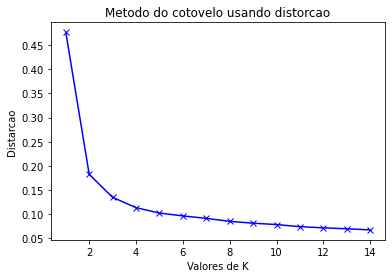

In [41]:
from scipy.spatial.distance import cdist
# metodo do cotovelo
intervalo = range(1, 15)
inercias = []
distorcao = []

for i in intervalo:
    kmeansModel = KMeans(n_clusters = i).fit(data_scaled)
    kmeansModel.fit(data_scaled)
    
    distorcao.append(sum(np.min(cdist(data_scaled, kmeansModel.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])
    inercias.append(kmeansModel.inertia_)


plt.plot(intervalo, distorcao, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distarcao')
plt.title('Metodo do cotovelo usando distorcao')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score